In [1]:
#import statements
import numpy as np
import healpy as hp
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import pysm3
import pysm3.units as u
import warnings
warnings.filterwarnings("ignore")

In [2]:
rc('text', usetex=True)
res_dpi = 300
ext = 'pdf'

In [3]:
#function that takes in frequency and makes a map
def make_map(freq):
    return sky.get_emission(freq * u.GHz) 

In [4]:
#function that takes in a map, the map_150, and  and outputs rbb80 value
def rbb80(map2, map_150, clbb1x1):
    clbb1x2 = hp.anafast(map_150, map2)[2][80]
    clbb2x2 = hp.anafast(map2)[2][80]
    return clbb1x2/(np.sqrt(clbb1x1*clbb2x2))

In [5]:
freqs = np.arange(150,3000,150)
rbb80_vals = np.ones((len(freqs),9))*1.
#for all of the models
for i in range(9):
    #make a sky
    sky = pysm3.Sky(nside=128, preset_strings=["d"+str(i)])
    #make 150GHz map, compute it's bbl80 value
    map_150GHz = sky.get_emission(150 * u.GHz)
    clbb1x1 = hp.anafast(map_150GHz)[2][80]
    #compute RlBB[80] for every 150GHz from 150GHz to 3THz
    for j, freq in enumerate(freqs):
        rbb80_vals[j][i] = (1 - rbb80(make_map(freq), map_150GHz, clbb1x1))

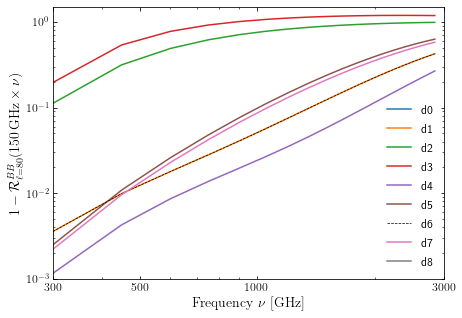

In [6]:
fig, ax = plt.subplots(1,1,figsize=(7, 5))
ax.set_xscale('log')
ax.set_xlabel(r'${\rm Frequency}\ \nu\ [{\rm GHz}]$', fontsize=14)
ax.set_yscale('log')
ax.set_ylabel(r'$1 - \mathcal{R}^{BB}_{\ell=80} (150\,{\rm GHz}\times\nu)$', fontsize=14)
ax.axis([300, 3000.,  1e-3, 1.5])
ax.xaxis.set_major_formatter(matplotlib.ticker.NullFormatter())
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='both', labelsize=12, bottom=True, top=True, left=True, right=True, direction='in')
ax.set_xticks([300, 500, 1000, 3000])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

models = np.array([0,1,2,3,4,5,6,7,8])
for i, model in enumerate(models):
    if i == 6:
        ax.plot(freqs[1:], rbb80_vals[1:,6], label= 'd'+str(i), linestyle='--', color='k', linewidth = 0.7)
    else:
        ax.plot(freqs[1:], rbb80_vals[1:,i], label= 'd'+str(i))
ax.legend(frameon=False, prop={'size': 12})
plt.savefig('rbb.' + ext,format=ext,dpi=res_dpi,bbox_inches='tight')